In [1]:
# %load main.py
import sys
# import importlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

from armax import armax
from config import config
import mysql_utils as mysql
import preprocessing
import visualization

In [2]:
DATA_FREQUENCY = dt.timedelta(minutes=5)

In [3]:
# DETECTOR_DATA_TABLE = "detector_data_processed_2017"
DETECTOR_ID = "608219"
# DETECTOR_DATA_QUERY = "SELECT DetectorID, Year, Month, Day, Time, Volume, Occupancy\
#                         FROM {} AS DD NATURAL JOIN detector_health AS DH\
#                         WHERE DetectorID = {} AND Health = 1\
#                         ORDER BY Year, Month, Day, Time;".format(DETECTOR_DATA_TABLE, DETECTOR_ID)

In [4]:
flow = pd.read_csv("data/detector_{}_flow_imputed.csv".format(DETECTOR_ID), index_col=0, parse_dates=True)

In [6]:
arma_model = armax(flow, frequency=DATA_FREQUENCY)

In [ ]:
arma_model.fit_to_order((1, 1), method="css", cross_validate=True, verbose=True)

In [8]:
arma_model.fit(method="css", ar_max=5, ma_max=5, cross_validate=True, verbose=True)

Fitting order (1, 1)
Cross validating monthly results in 11 folds
Trained month 0; sse 49489.39286521674
Trained month 1; sse 54007.34153358485
Trained month 2; sse 50086.3910774919
Trained month 3; sse 51852.29979499325
Trained month 4; sse 54034.54326377268
Trained month 5; sse 46770.629597132494
Trained month 6; sse 50423.68917010537
Trained month 7; sse 50671.23017513943
Trained month 8; sse 53948.959334268155
Trained month 9; sse 51294.258382738175
Trained month 10; sse 51508.77589228073
Finished cross validation with order (1, 1); average sse 47007.29259056031
Order (1, 1) sse: 47007.29259056031
Fitting order (1, 2)
Cross validating monthly results in 11 folds
Trained month 0; sse 49234.72211401269
Trained month 1; sse 53737.270404151684
Trained month 2; sse 50018.350632340596
Trained month 3; sse 51674.39182346225
Trained month 4; sse 53792.29937007911
Trained month 5; sse 46697.679543251455
Trained month 6; sse 50262.00813101928
Trained month 7; sse 50457.964194998916
Trained m

Trained month 6; sse 50112.62516270053
Trained month 7; sse 50080.60738261584
Trained month 8; sse 54038.181050425854
Trained month 9; sse 50962.26479968354
Trained month 10; sse 51079.91910094687
Finished cross validation with order (3, 4); average sse 46656.96128507793
Order (3, 4) sse: 46656.96128507793
Fitting order (3, 5)
Cross validating monthly results in 11 folds
Trained month 0; sse 49105.92716242771
Trained month 1; sse 53602.26468232753
Trained month 2; sse 49988.774912985005
Trained month 3; sse 51588.5664256882
Trained month 4; sse 53648.59270188011
Trained month 5; sse 46680.454917387455
Trained month 6; sse 50182.61237042573
Trained month 7; sse 50305.91595960866
Trained month 8; sse 53982.30342641895
Trained month 9; sse 51054.038670455244
Trained month 10; sse 51251.754955837365
Finished cross validation with order (3, 5); average sse 46782.6005154535
Order (3, 5) sse: 46782.6005154535
Fitting order (4, 1)
Cross validating monthly results in 11 folds
Trained month 0; s

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.title("ARMA(3, 3) Model for Flow Detector Data in 2017")
fig.autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Flow")

plt.plot(time[:5000], flow.values[:5000])
plt.plot(time[:5000], armax_model._armax_models[armax_model.get_best_model_order()].fittedvalues.values[:5000])
plt.show()

In [16]:
z = np.zeros((5, 5))

for order in arma_model._armax_models:
    m = arma_model._armax_models[order]
    z[order[0]-1, order[1]-1] = m.sse
#     print(m.aic)
#     print(m.bic)
#     print(m.sse)

print(np.round(z))

[[47007. 46859. 46720. 46637. 46816.]
 [46974. 46775. 46758. 46658. 46755.]
 [46798. 46708. 46707. 46657. 46783.]
 [46754. 46709. 46855. 46773. 46700.]
 [46659. 46676. 46706. 46742. 45380.]]


In [17]:
arma_model.get_best_model()

In [19]:
best_arma_eyeballed = arma_model._armax_models[(3, 2)]

In [92]:
str(arma_model.get_dates()[0])

'2017-01-01 00:00:00'

In [130]:
best_arma_eyeballed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      0   No. Observations:               105120
Model:                     ARMA(3, 2)   Log Likelihood             -453018.922
Method:                           css   S.D. of innovations             18.006
Date:                Fri, 04 Jan 2019   AIC                         906051.845
Time:                        01:00:14   BIC                         906118.784
Sample:                    01-01-2017   HQIC                        906072.114
                         - 12-31-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        282.6895     10.097     27.996      0.000     262.899     302.480
ar.L1.0        0.6918      0.006    124.273      0.000       0.681       0.703
ar.L2.0        0.9271      0.002    383.221      0.000       0.922       0.932
ar.L3.0       -0.6254      0.005   -115.761      0.000      -0.636      -0.615
ma.L1.0        0.4705      0.007     71.608      0.000       0.458       0.483
ma.L2.0       -0.3078      0.006    -49.648      0.000      -0.320      -0.296
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0441           +0.0000j            1.0441            0.5000
AR.2            1.0097           +0.0000j            1.0097            0.0000
AR.3            1.5169           +0.0000j            1.5169            0.0000
MA.1           -1.1935           +0.0000j            1.1935            0.5000
MA.2            2.7221           +0.0000j            2.7221            0.0000
-----------------------------------------------------------------------------
"""

In [127]:
arma_predictions = best_arma_eyeballed.predict(start='2017-12-01 00:00:00', end="2017-12-07 23:55:00", dynamic=True)

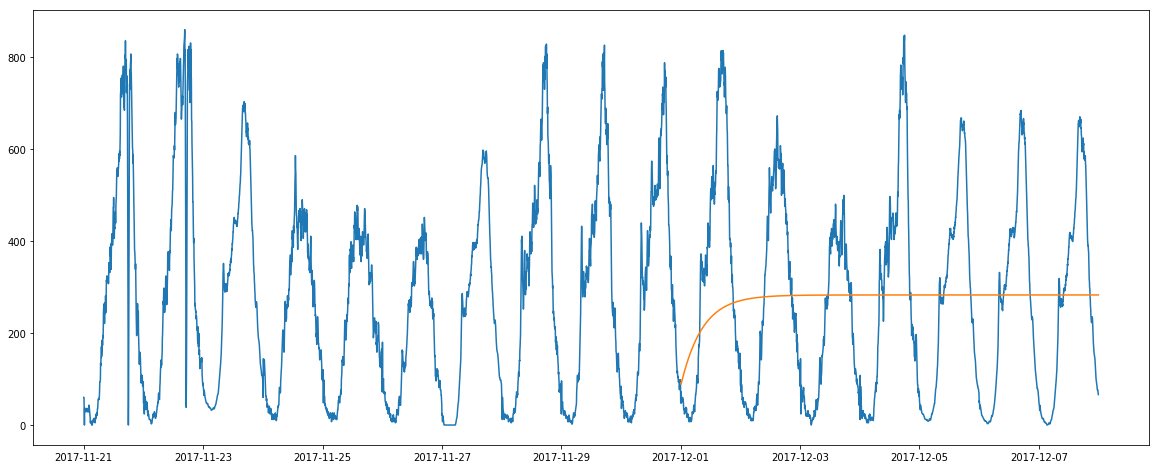

In [128]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(flow[((flow.index.month == 11) & (flow.index.day > 20)) | ((flow.index.month == 12) & (flow.index.day < 8))])
plt.plot(arma_predictions)
plt.show()

In [ ]:
index0 = min(range(len(time)), key=lambda i: (1 - (time[i].month == 9)))
index1 = min(range(len(time)), key=lambda i: (1 - (time[i].month == 10)))
index2 = min(range(len(time)), key=lambda i: (1 - (time[i].month == 11)))
index3 = min(range(len(time)), key=lambda i: (1 - (time[i].month == 12)))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
fig.autofmt_xdate()
plt.plot(time[index0:index1], flow[index0:index1])
plt.plot(time[index0:index1], a.fittedvalues[index0:index1])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
fig.autofmt_xdate()
plt.plot(time[index1:index2], flow[index1:index2])
plt.plot(time[index1:index2], a.fittedvalues[index1:index2])
plt.show()

In [76]:
flow_exog = flow[:flow.shape[0]//2]
flow_endog = flow[flow.shape[0]//2:]

In [77]:
flow_endog = flow_endog.set_index(flow_exog.index)

In [80]:
armax_model = armax(flow_endog, exog=flow_exog.values, frequency=DATA_FREQUENCY)

In [82]:
armax_model.get_endog().shape

(52560, 1)

In [83]:
armax_model.get_exog().shape

(52560, 1)

In [84]:
armax_model.fit(method="css", ar_max=5, ma_max=5, cross_validate=False, verbose=True)

Fitting order (1, 1)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (1, 1) sse: 19328268.438848563
Fitting order (1, 2)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (1, 2) sse: 18353858.21378947
Fitting order (1, 3)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (1, 3) sse: 17259822.894606568
Fitting order (1, 4)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (1, 4) sse: 16507702.196864676
Fitting order (1, 5)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (1, 5) sse: 14767396.284809658
Fitting order (2, 1)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (2, 1) sse: 18415254.790867444
Fitting order (2, 2)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (2, 2) sse: 17671916.13798523
Fitting order (2, 3)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (2, 3) sse: 17095123.146222986
Fitting order (2, 4)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (2, 4) sse: 15121088.660874818
Fitting order (2, 5)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (2, 5) sse: 14730005.635216232
Fitting order (3, 1)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (3, 1) sse: 17440744.792613003
Fitting order (3, 2)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (3, 2) sse: 17176949.120549664
Fitting order (3, 3)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (3, 3) sse: 17136793.411046244
Fitting order (3, 4)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (3, 4) sse: 14926694.961452177
Fitting order (3, 5)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (3, 5) sse: 14722567.40831446
Fitting order (4, 1)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (4, 1) sse: 17277958.721326947
Fitting order (4, 2)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (4, 2) sse: 17167272.00764692
Fitting order (4, 3)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (4, 3) sse: 15961072.835403323
Fitting order (4, 4)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (4, 4) sse: 14692308.269381646
Fitting order (4, 5)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (4, 5) sse: 14679486.406734688
Fitting order (5, 1)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (5, 1) sse: 16724410.934445443
Fitting order (5, 2)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (5, 2) sse: 16010690.510400863
Fitting order (5, 3)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (5, 3) sse: 15320247.318895757
Fitting order (5, 4)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (5, 4) sse: 14689364.073232379
Fitting order (5, 5)


/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Order (5, 5) sse: 14673478.460702604
Done fitting ARMA model; best order: (5, 5)


In [87]:
z2 = np.zeros((5, 5))

for order in armax_model._armax_models:
    m = armax_model._armax_models[order]
    z2[order[0]-1, order[1]-1] = m.bic
#     print(m.aic)
#     print(m.bic)
#     print(m.sse)

print(np.round(z2))

[[459697. 456989. 453769. 451439. 445594.]
 [457157. 455002. 453269. 446831. 445464.]
 [454302. 453512. 453400. 446154. 445441.]
 [453813. 453486. 449668. 445325. 445290.]
 [452105. 449823. 447518. 445318. 445272.]]
